Chapter 06

# 三维空间平面
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用Matplotlib库绘制了多个三维平面图，通过给定的参数方程在三维空间中展示了不同平面的方程形式及其位置。代码的主要内容包括定义网格、设置方程、以及使用自定义函数$plot\_surf$绘制各个平面。$plot\_surf$函数负责处理图形样式、坐标轴范围、标题和颜色映射。具体步骤如下：

1. **定义网格和绘图函数**：定义了网格分辨率$num = 33$，并创建了三维网格数据$xx$和$yy$，以生成平面的$x$和$y$坐标。自定义函数$plot\_surf$通过输入网格数据$(xx, yy, zz)$以及标题$caption$来绘制三维平面图。该函数对$zz$数据进行颜色映射，以不同颜色代表不同的高度。

2. **绘制多个平面**：代码依次定义了七个平面，通过设定$zz$或$yy$的不同方程来绘制。每个平面通过不同的方程描述，显示出不同的斜率或位置：
   - **$z - 2 = 0$**：平面$z = 2$，恒定高度为$2$的水平平面。
   - **$z - y = 0$**：平面$z = y$，展示$z$和$y$相等时的平面。
   - **$x - z = 0$**：平面$z = x$，展示$z$和$x$相等时的平面。
   - **$x + y - z = 0$**：平面$z = x + y$，展示$z$作为$x$和$y$之和的平面。
   - **$y - 2 = 0$**：平面$y = 2$，恒定高度为$2$的垂直平面。
   - **$x + y - 2 = 0$**：平面$y = 2 - x$，展示$y$作为$2 - x$的平面。
   - **$x + 2 = 0$**：平面$x = -2$，恒定高度为$-2$的垂直平面。

3. **设置绘图样式**：$plot\_surf$中将投影类型设为正交，并根据各平面数据的范围自动调整$x, y, z$的坐标轴限制。添加了网格线、透明背景、标签以及视角设置，以便于观察和区分各平面。

通过这些设置，代码清晰地展示了不同方程定义的平面及其相对位置，形成了一个三维空间中的几何展示。各平面的表达方式分别为：
- 水平平面：$z = 2$
- 垂直平面：$y = 2, x = -2$ 
- 倾斜平面：$z = y, z = x, z = x + y$

In [1]:
## 导入所需库

In [2]:
import math  # 导入math库，用于数学计算
import numpy as np  # 导入numpy库，用于数值计算
import matplotlib.pyplot as plt  # 导入matplotlib库，用于绘图
from matplotlib import cm  # 导入colormap库，用于色彩映射

In [3]:
## 自定义函数 - 绘制三维曲面图

In [14]:
def plot_surf(xx, yy, zz, caption):  # 定义绘制三维曲面图的函数，参数为网格数据xx、yy、zz和标题caption
    norm_plt = plt.Normalize(zz.min(), zz.max())  # 归一化zz的数据，用于色彩映射
    colors = cm.RdYlBu_r(norm_plt(zz))  # 使用"RdYlBu_r"配色方案创建颜色映射

    fig = plt.figure()  # 创建图形对象
    ax = plt.axes(projection='3d')  # 创建三维坐标轴对象
    surf = ax.plot_surface(xx, yy, zz, facecolors=colors, shade=False)  # 绘制曲面图，使用颜色映射
    surf.set_facecolor((0, 0, 0, 0))  # 设置透明背景色

    ax.set_proj_type('ortho')  # 设置投影类型为正交投影

    if xx.min() == xx.max():  # 设置x轴范围，如果xx最小值等于最大值，给x轴添加范围
        ax.set_xlim(xx.min() - 4, xx.min() + 4)
    else:
        ax.set_xlim(xx.min(), xx.max())
    
    if yy.min() == yy.max():  # 设置y轴范围
        ax.set_ylim(yy.min() - 4, yy.min() + 4)
    else:
        ax.set_ylim(yy.min(), yy.max())
        
    if zz.min() == zz.max():  # 设置z轴范围
        ax.set_zlim(zz.min() - 4, zz.min() + 4)
    else:
        ax.set_zlim(zz.min(), zz.max())

    plt.tight_layout()  # 自动调整布局，避免重叠
    ax.set_xlabel(r'$\it{x}$')  # 设置x轴标签
    ax.set_ylabel(r'$\it{y}$')  # 设置y轴标签
    ax.set_zlabel(r'$\it{z}$')  # 设置z轴标签
    ax.set_title(caption)  # 设置图形标题
    ax.view_init(azim=-135, elev=30)  # 设置观察视角
    ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 设置x轴网格样式
    ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 设置y轴网格样式
    ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 设置z轴网格样式

## 定义网格参数

In [5]:
num = 33  # 定义网格分辨率
x = np.linspace(-4, 4, num)  # 生成从-4到4的x轴数据
y = np.linspace(-4, 4, num)  # 生成从-4到4的y轴数据
xx, yy = np.meshgrid(x, y)  # 创建x和y的网格数据

## 绘制 z - 2 = 0 平面

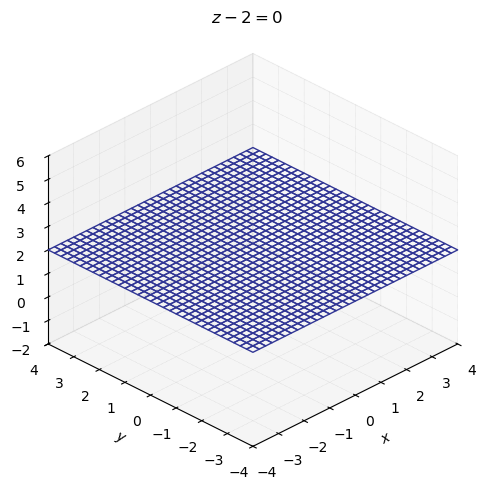

In [6]:
zz = 2 + xx * 0  # 定义zz数据，z恒等于2
caption = '$z - 2 = 0$'  # 设置标题
plot_surf(xx, yy, zz, caption)  # 绘制图形

## 绘制 y - z = 0 平面

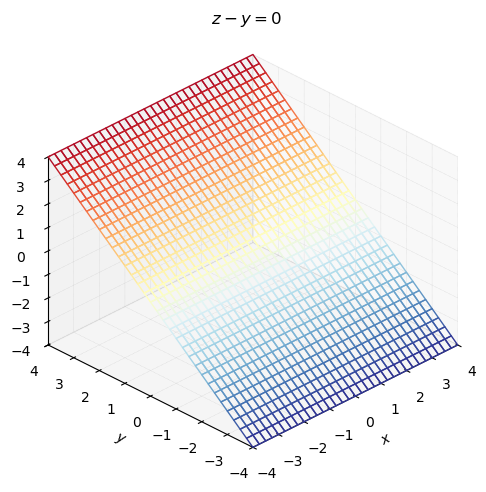

In [7]:
zz = yy  # 定义zz数据，z等于y
caption = '$z - y = 0$'  # 设置标题
plot_surf(xx, yy, zz, caption)  # 绘制图形

## 绘制 x - z = 0 平面

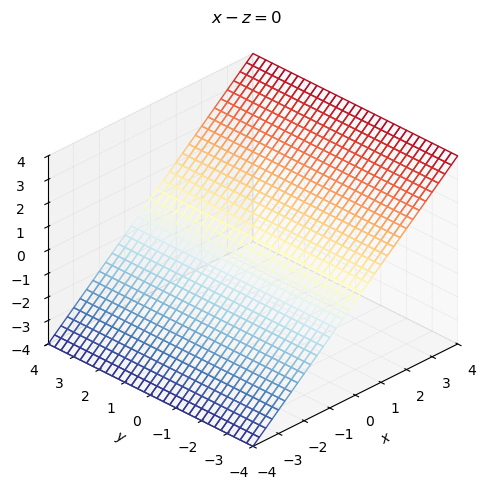

In [8]:
zz = xx  # 定义zz数据，z等于x
caption = '$x - z = 0$'  # 设置标题
plot_surf(xx, yy, zz, caption)  # 绘制图形

## 绘制 x + y - z = 0 平面

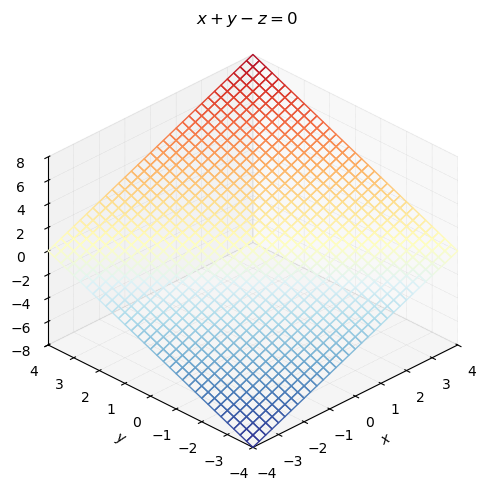

In [9]:
zz = xx + yy  # 定义zz数据，z等于x + y
caption = '$x + y - z = 0$'  # 设置标题
plot_surf(xx, yy, zz, caption)  # 绘制图形

## 定义垂直网格参数

In [10]:
x = np.linspace(-4, 4, num)  # 生成从-4到4的x轴数据
z = np.linspace(-4, 4, num)  # 生成从-4到4的z轴数据
xx, zz = np.meshgrid(x, z)  # 创建x和z的网格数据

## 绘制 y - 2 = 0 平面

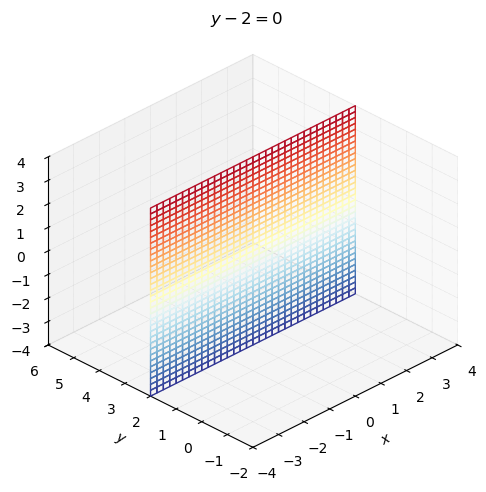

In [11]:
yy = 2 - xx * 0  # 定义yy数据，y恒等于2
caption = '$y - 2 = 0$'  # 设置标题
plot_surf(xx, yy, zz, caption)  # 绘制图形

## 绘制 x + y - 2 = 0 平面

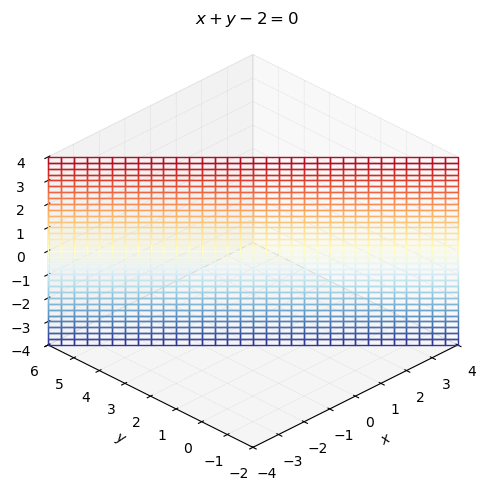

In [12]:
yy = 2 - xx  # 定义yy数据，y等于2 - x
caption = '$x + y - 2 = 0$'  # 设置标题
plot_surf(xx, yy, zz, caption)  # 绘制图形

## 绘制 x + 2 = 0 平面

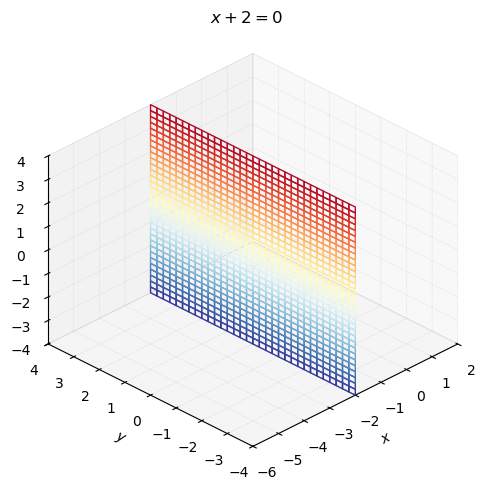

In [13]:
y = np.linspace(-4, 4, num)  # 重新定义从-4到4的y轴数据
z = np.linspace(-4, 4, num)  # 重新定义从-4到4的z轴数据
yy, zz = np.meshgrid(y, z)  # 创建y和z的网格数据

xx = -2 - yy * 0  # 定义xx数据，x恒等于-2
caption = '$x + 2 = 0$'  # 设置标题
plot_surf(xx, yy, zz, caption)  # 绘制图形